# Studio dei tempi di calcolo

In [8]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [9]:
%matplotlib widget
plt.close('all')

In [10]:
grid_sizes = range(100, 200, 50)
sub_grid_sizes = range(50, 100, 10)

reduce_times = np.zeros((len(grid_sizes), len(sub_grid_sizes)))
compute_times = np.zeros((len(grid_sizes), len(sub_grid_sizes)))

for i, grid_size in enumerate(grid_sizes):
    for j, sub_grid_size in enumerate(sub_grid_sizes):

        if sub_grid_size >= grid_size:
            reduce_times[i, j] = np.nan
            compute_times[i, j] = np.nan
            continue

        film_matrix = generate_film_perlin(grid_size, scale=20, threshold=0.005)

        sim = ExperimentSimulation(film_matrix, split_size=sub_grid_size)

        start_time = time()
        sim.reduced_regions_network
        end_time = time()
        reduce_times[i, j] = end_time - start_time

        start_time = time()
        apply_lr_electrodes_and_solve(sim, 1.0)
        end_time = time()
        compute_times[i, j] = end_time - start_time

        print(f"Grid size: {grid_size}, Sub-grid size: {sub_grid_size} - Reduce time: {reduce_times[i, j]:.4f}s, Compute time: {compute_times[i, j]:.4f}s")


Grid size: 100, Sub-grid size: 50 - Reduce time: 0.7895s, Compute time: 0.2598s
Grid size: 100, Sub-grid size: 60 - Reduce time: 0.6339s, Compute time: 0.2401s
Grid size: 100, Sub-grid size: 70 - Reduce time: 0.7166s, Compute time: 0.2668s
Grid size: 100, Sub-grid size: 80 - Reduce time: 0.7663s, Compute time: 0.3107s
Grid size: 100, Sub-grid size: 90 - Reduce time: 0.9351s, Compute time: 0.3908s
Grid size: 150, Sub-grid size: 50 - Reduce time: 1.5737s, Compute time: 0.7546s
Grid size: 150, Sub-grid size: 60 - Reduce time: 1.5109s, Compute time: 0.7003s
Grid size: 150, Sub-grid size: 70 - Reduce time: 1.7228s, Compute time: 0.8254s
Grid size: 150, Sub-grid size: 80 - Reduce time: 1.7528s, Compute time: 0.8694s
Grid size: 150, Sub-grid size: 90 - Reduce time: 1.8074s, Compute time: 0.8956s


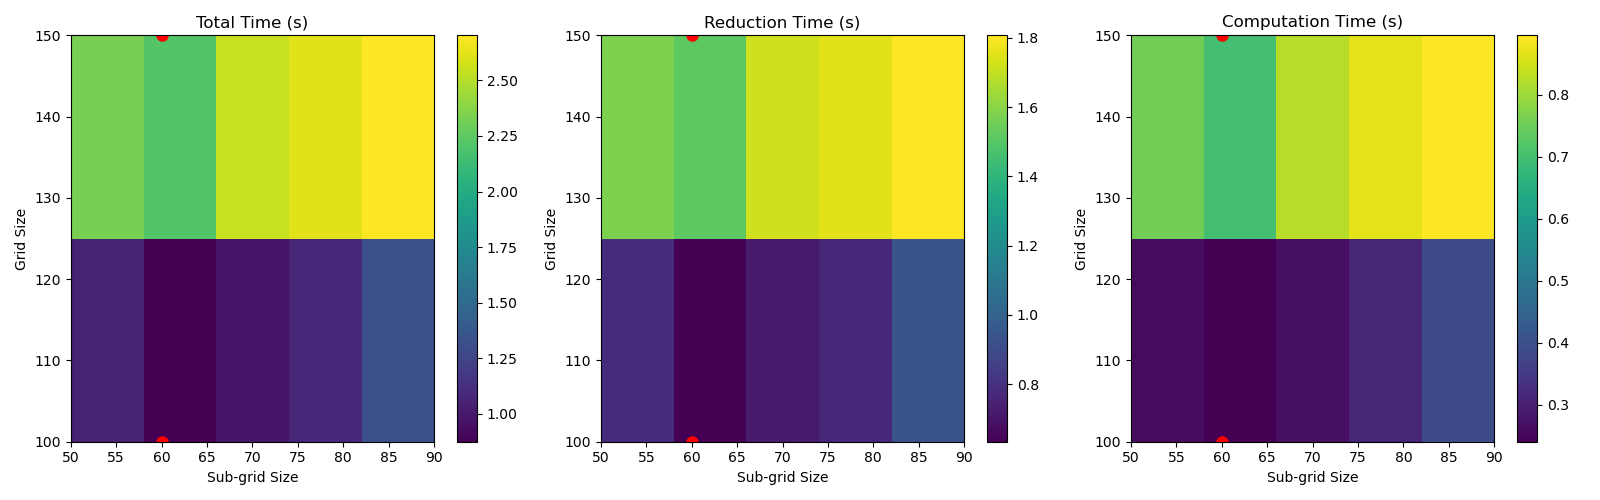

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

total_ax, reduction_ax, computation_ax = axs.flat

im1 = reduction_ax.imshow(reduce_times, origin='lower',
                          extent=[min(sub_grid_sizes), max(sub_grid_sizes), min(grid_sizes), max(grid_sizes)],
                          aspect='auto', cmap='viridis')
reduction_ax.set_title('Reduction Time (s)')
reduction_ax.set_xlabel('Sub-grid Size')
reduction_ax.set_ylabel('Grid Size')
fig.colorbar(im1, ax=reduction_ax)

im2 = computation_ax.imshow(compute_times, origin='lower',
                           extent=[min(sub_grid_sizes), max(sub_grid_sizes), min(grid_sizes), max(grid_sizes)],
                           aspect='auto', cmap='viridis')
computation_ax.set_title('Computation Time (s)')
computation_ax.set_xlabel('Sub-grid Size')
computation_ax.set_ylabel('Grid Size')
fig.colorbar(im2, ax=computation_ax)

total_times = reduce_times + compute_times
im3 = total_ax.imshow(total_times, origin='lower',
                     extent=[min(sub_grid_sizes), max(sub_grid_sizes), min(grid_sizes), max(grid_sizes)],
                     aspect='auto', cmap='viridis')
total_ax.set_title('Total Time (s)')
total_ax.set_xlabel('Sub-grid Size')
total_ax.set_ylabel('Grid Size')
fig.colorbar(im3, ax=total_ax)


# Find and plot minimums for each grid size
for i, grid_size in enumerate(grid_sizes):
    # Reduction time minimum
    j_red = np.nanargmin(reduce_times[i])
    reduction_ax.plot(sub_grid_sizes[j_red], grid_size, 'ro', markersize=8, label='Min' if i == 0 else "")
    # Computation time minimum
    j_comp = np.nanargmin(compute_times[i])
    computation_ax.plot(sub_grid_sizes[j_comp], grid_size, 'ro', markersize=8, label='Min' if i == 0 else "")
    # Total time minimum
    j_tot = np.nanargmin(total_times[i])
    total_ax.plot(sub_grid_sizes[j_tot], grid_size, 'ro', markersize=8, label='Min' if i == 0 else "")

"""# Add legend only once per axis
for ax in axs:
    handles, labels = ax.get_legend_handles_labels()
    if 'Min' in labels:
        ax.legend()"""

plt.tight_layout()
plt.show()
